In [148]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [149]:
#importing data
data= pd.read_csv('Fraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [150]:
type(data)

pandas.core.frame.DataFrame

In [151]:
data.shape

(1009333, 11)

In [152]:
#Preprocessing the data
data= data[list(data.columns[2:])]
data= data.drop(['nameDest', 'nameOrig'], axis=1)
data= data.dropna()
print(data.shape)
data.head()


(1009332, 7)


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0
1,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0
2,181.00,181.0,0.00,0.0,0.0,1.0,0.0
3,181.00,181.0,0.00,21182.0,0.0,1.0,0.0
4,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0


In [153]:
#Calculating the VIF value to treat multicollinearity
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data[list(data.columns[:-2])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
2,764.170828,newbalanceOrig
1,761.315916,oldbalanceOrg
4,40.550635,newbalanceDest
3,37.617589,oldbalanceDest
0,1.664601,amount


In [52]:
#Finding missing values
data.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1009328,False,False,False,False,False,False,False,False,False,False,False
1009329,False,False,False,False,False,False,False,False,False,False,False
1009330,False,False,False,False,False,False,False,False,False,False,False
1009331,False,False,False,False,False,False,False,False,False,False,False


In [53]:
data.isnull().sum()

step              0
type              0
amount            1
nameOrig          1
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009333 entries, 0 to 1009332
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1009333 non-null  int64  
 1   type            1009333 non-null  object 
 2   amount          1009332 non-null  float64
 3   nameOrig        1009332 non-null  object 
 4   oldbalanceOrg   1009332 non-null  float64
 5   newbalanceOrig  1009332 non-null  float64
 6   nameDest        1009332 non-null  object 
 7   oldbalanceDest  1009332 non-null  float64
 8   newbalanceDest  1009332 non-null  float64
 9   isFraud         1009332 non-null  float64
 10  isFlaggedFraud  1009332 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 84.7+ MB


In [55]:
data.dropna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1009327,46,TRANSFER,460382.20,C964554525,0.0,0.00,C358839398,1494084.40,1954466.60,0.0,0.0
1009328,46,TRANSFER,599326.42,C178471881,0.0,0.00,C1281898359,9418176.68,10017503.10,0.0,0.0
1009329,46,TRANSFER,1284506.60,C1069472372,0.0,0.00,C793315160,4676653.80,5961160.40,0.0,0.0
1009330,46,TRANSFER,124801.06,C1178172487,0.0,0.00,C793302743,5274092.74,5398893.80,0.0,0.0


In [56]:
#Removing zero values
data['nameOrig'].fillna('C1231006815', inplace= True)
data['oldbalanceOrg'].fillna('8.778681e+05', inplace= True)
data['newbalanceOrig'].fillna('8.984670e+05', inplace= True)
data['oldbalanceDest'].fillna('9.845256e+05	', inplace= True)
data['newbalanceDest'].fillna('1.123367e+06	', inplace= True)
data['isFraud'].fillna('5.379796e-04', inplace= True)
data['isFlaggedFraud'].fillna('0.0', inplace= True)
data['nameDest'].fillna('M1979787155	', inplace= True)
data['amount'].fillna('1.597863e+05', inplace= True)
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

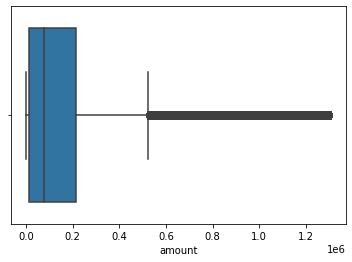

In [89]:
#Finding outliers
sns.boxplot(x=data['amount'])


In [94]:
#Removing outliers
print(data['amount'].quantile(0.25))
print(data['amount'].quantile(0.45))
print(data['amount'].quantile(0.35))

12647.294999999998
55786.8715
23583.032


In [97]:
import numpy as np
data['amount']= np.where(data['amount']>55786.8715,23583.032,data['amount'])
data['amount'].describe()

count    1.009332e+06
mean     1.986321e+04
std      1.003219e+04
min      1.000000e-01
25%      1.264729e+04
50%      2.358303e+04
75%      2.358303e+04
max      5.578652e+04
Name: amount, dtype: float64

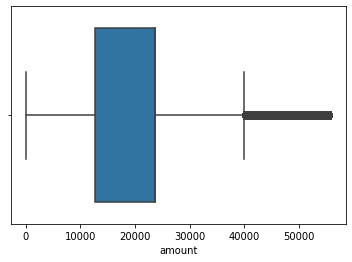

In [98]:
sns.boxplot(x=data['amount'])

In [104]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.009333e+06,1.009332e+06,1.009332e+06,1.009332e+06,1.009332e+06,1.009332e+06,1.009332e+06,1009332.0
mean,2.534647e+01,1.597863e+05,8.778681e+05,8.984670e+05,9.845256e+05,1.123367e+06,5.379796e-04,0.0
std,1.274633e+01,2.592227e+05,2.987209e+06,3.024059e+06,2.303962e+06,2.424628e+06,2.318816e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.400000e+01,1.264729e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.896417e+04,1.594600e+04,0.000000e+00,1.336049e+05,2.283183e+05,0.000000e+00,0.0
75%,3.800000e+01,2.160109e+05,1.386571e+05,1.784905e+05,9.248887e+05,1.164610e+06,0.000000e+00,0.0
max,4.600000e+01,1.000000e+07,3.893942e+07,3.894623e+07,4.205466e+07,4.216916e+07,1.000000e+00,0.0


In [167]:
#Building Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
train= data.drop(['amount','oldbalanceOrg','oldbalanceDest'], axis=1)
test= data['amount']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [169]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [170]:
clf.predict(X_test)

array([ 1.10667022,  0.77812285,  0.94574286,  0.22125004,  0.81467138,
        0.22453452,  0.26908771,  1.36335004,  0.47756856,  0.18820278,
        1.09405295, -0.18517934,  0.77414952,  0.2881012 ,  1.36809374,
        1.51423875,  1.09682473,  0.83818321,  0.25542401,  0.77138939,
        2.04111133,  0.06508169,  0.13169295,  1.33271176,  0.1326566 ,
        0.87750253,  1.23072433,  1.53364184,  0.45583364,  0.92198191,
        1.60803274,  2.10859799, -0.11948325,  1.05865869,  0.45237168,
        1.7944798 ,  1.99568044,  1.63058756,  1.85298333,  1.7278008 ,
        1.85798029,  2.05691144,  1.02820463,  0.23346794, -0.01277133,
        0.97792315,  0.92314623,  0.41348308,  2.215496  ,  1.26303828,
        0.89157132,  0.1680832 ,  1.89629315, -0.19116028])

In [171]:
#Checking accuracy
clf.score(X_test, y_test)

0.881862127051407

In [173]:
#How did you select variables to be included in the model?
#I have selectd variables by - Handling missing values and low variability, avoiding multi-collinearity and reducing outliers. I have used Linear Regression classifier in my model to check accuracy

In [174]:
#Demonstrate the performance of the model by using best set of tools.
#The purpose of holdout evaluation is to test a model on different data than it was trained on. This provides an unbiased estimate of learning performance.
#In this method, the dataset is randomly divided into three subsets:
#1.Training set is a subset of the dataset used to build predictive models.
#2.Validation set is a subset of the dataset used to assess the performance of the model built in the training phase. It provides a test platform for fine-tuning a model’s parameters and selecting the best performing model. Not all modeling algorithms need a validation set.
#3.Test set, or unseen data, is a subset of the dataset used to assess the likely future performance of a model. If a model fits to the training set much better than it fits the test set, overfitting is probably the cause.
#Accuracy is a common evaluation metric for classification problems. It’s the number of correct predictions made as a ratio of all predictions made. I used sklearn module to compute the accuracy of a classification task and got 88 percent accuracy.

In [175]:
#What are the key factors that predict fraudulent customer? 
#Data
#Validation mechanism for predicted outcomes
#Monitoring prediction outcomes

In [176]:
#Do these factors make sense? If yes, How? If not, How not? 
#Yes.  Data: Machine learning algorithms require data. The data shall be relevant, qualitative, adequate and unbiased. Not all data that one may have is relevant, qualitative, or adequate. Qualitative data reflects on the completeness and correctness of the data considered for the machine learning. Bias in the source data may make the predictions inconsistent thereby impacting the results, specifically when it would question the integrity of a customer/employee as the case may be. In light of the fact that certain predictions may be difficult to validate, having an unbiased data set is of utmost importance.
#Validation mechanism for predicted outcomes: It is hypercritical to understand that fraud prediction models with limited or no human intervention may not be possible in all circumstances. Instead, it is critical also to know how humans along with machine learning intelligence can better prevent frauds. A structured validation mechanism of the transactional prediction is essential to make a machine learning model successful. The validation mechanism shall be focused on using the predicted outcomes to gather pieces of evidence that proves or disproves the prediction. These outcomes could be essential feed for enhancing the model accuracy and precision.
#Monitoring prediction outcomes: Black box approaches for machine learning are prominent, but they do not necessarily exhibit the determinants for prediction. While alternative researches and approaches towards understanding the predictions or patterns learned are in progress, more attention is required towards monitoring the outcomes. Monitoring the input data trends and changes in the patterns over the period and cross-correlating the same with the changes in the prediction, running mock transactions and review of false positives to identify the extent to which the model needs to be tuned is critical. Monitoring is a critical role that is required to avoid possibilities of over-reliance on prediction systems.

In [177]:
#What kind of prevention should be adopted while company update its infrastructure?
#authentication protection, network-level protection, ID verification by pre-trained Neural Network etc are some preventions a company should adopt to prevent fraud transaction.

In [178]:
#Assuming these actions have been implemented, how would you determine if they work?
#By feeding data, extracting features, training the algorithm and creating a model just like I did in this project.